# Libraries and data files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boxes_metrics = pd.read_json("./detections/frame_by_frame/metrics/boxes.json", orient = "table")

preprocess_metrics = pd.read_json("./detections/frame_by_frame/metrics/preprocess.json", orient = "table")
inference_metrics = pd.read_json("./detections/frame_by_frame/metrics/inference.json", orient = "table")
postprocess_metrics = pd.read_json("./detections/frame_by_frame/metrics/postprocess.json", orient = "table")

# Detection metrics

## By Video

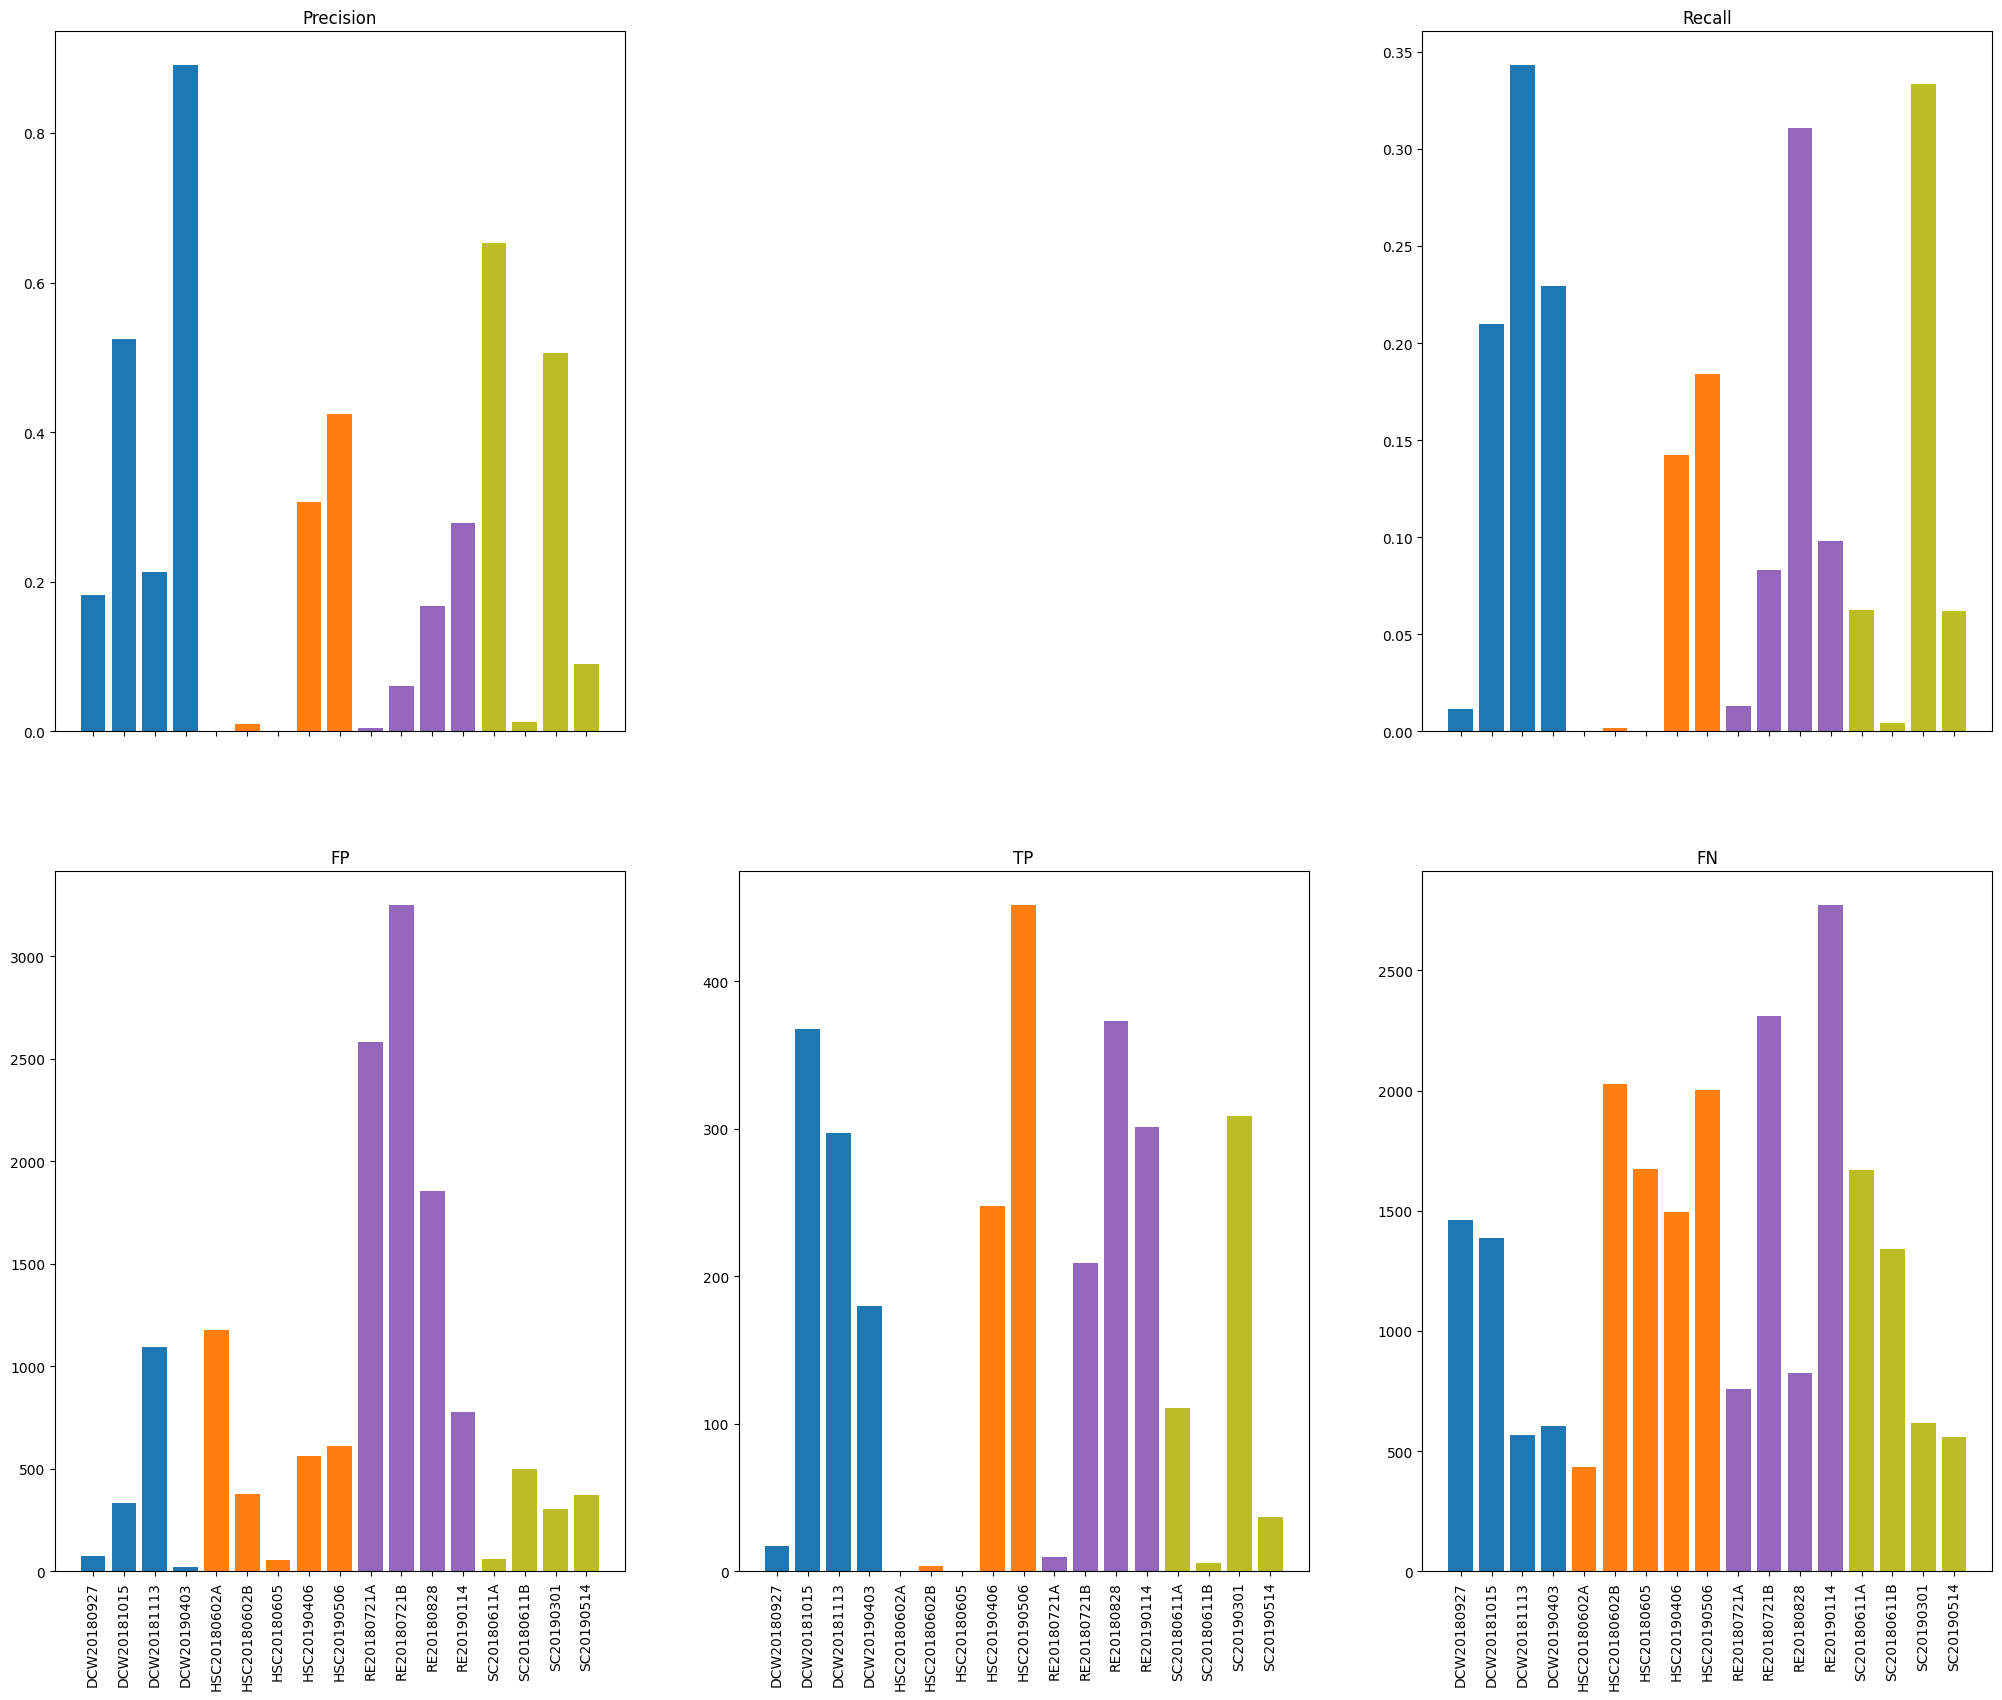

In [2]:
fig, axs = plt.subplots(2, 3, figsize = (25, 20), sharex = True)

metric_list = ["Precision", "", "Recall", "FP", "TP", "FN"]
video_list = boxes_metrics.columns.tolist()

colors = ["tab:blue", "tab:blue", "tab:blue", "tab:blue",
          "tab:orange", "tab:orange", "tab:orange", "tab:orange", "tab:orange",
          "tab:purple", "tab:purple", "tab:purple", "tab:purple", 
          "tab:olive", "tab:olive", "tab:olive", "tab:olive"]

for count, metric in enumerate(metric_list):
    x = count % 3
    y = int(count / 3)

    if metric == "":
        axs[y][x].set_axis_off()
    else:
        axs[y][x].bar(video_list, pd.DataFrame(boxes_metrics.loc[metric])[metric], color = colors)
        axs[y][x].set_title(metric)
        axs[y][x].tick_params(axis = "x", rotation = 90)

## By Creek

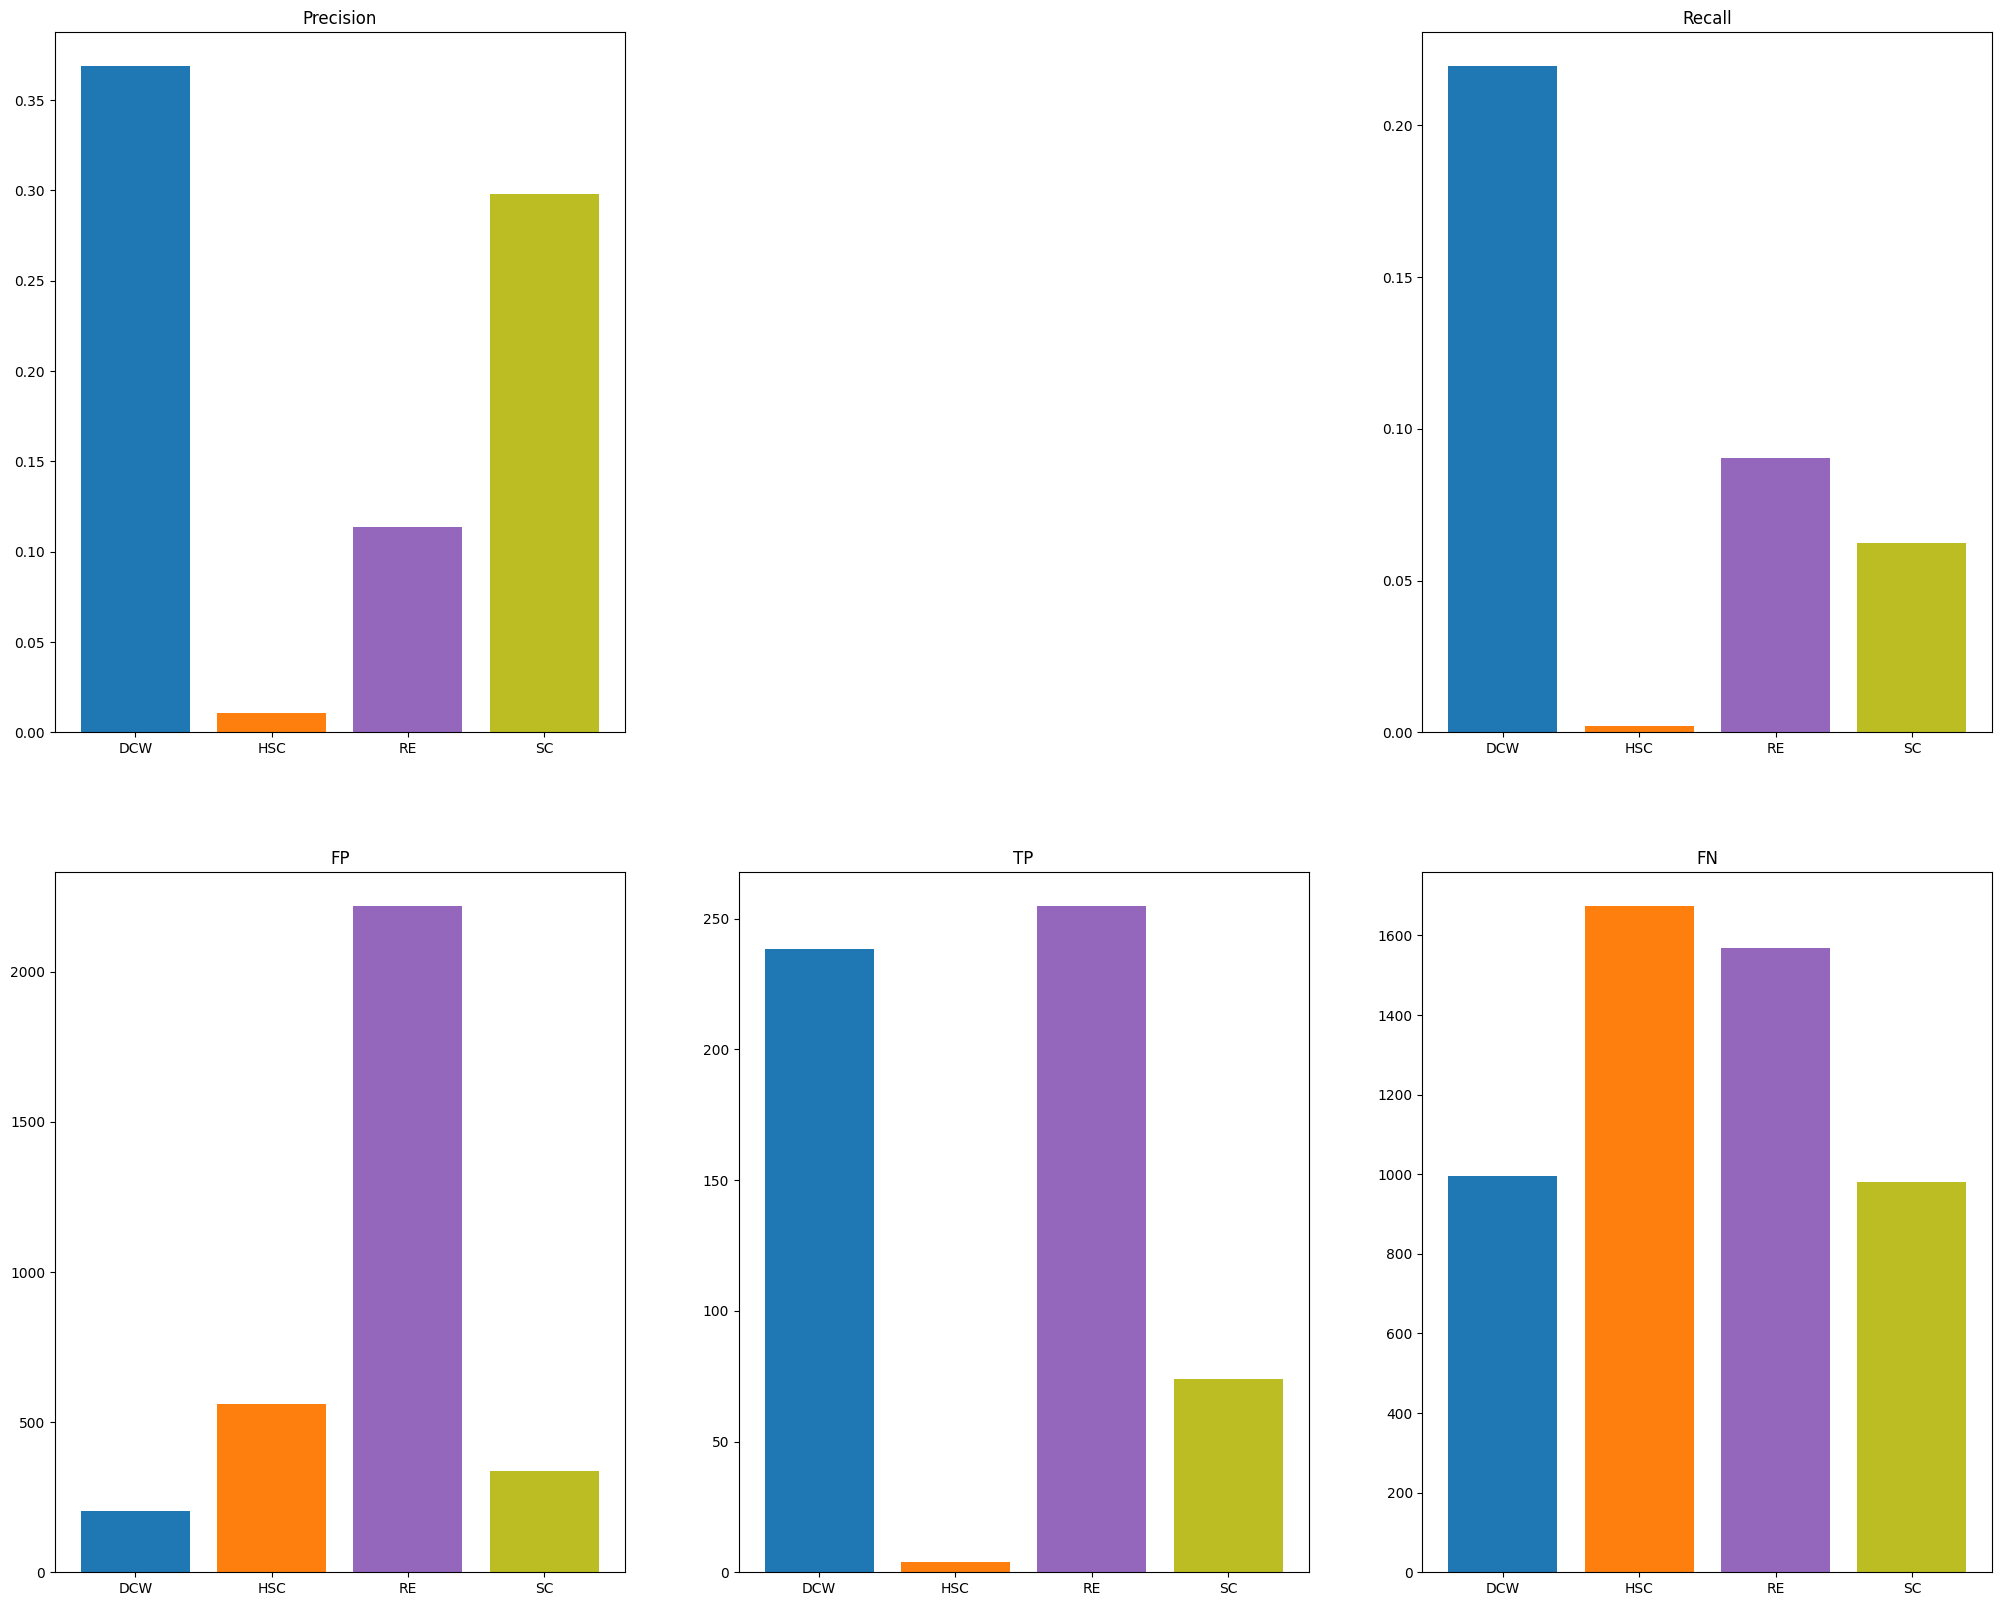

In [3]:
columns_list = boxes_metrics.columns.tolist()

dcw_list = columns_list[0:4]
hsc_list = columns_list[4:9]
re_list = columns_list[9:13]
sc_list = columns_list[13:17]

boxes_metrics["DCW"] = boxes_metrics[dcw_list].median(axis=1)
boxes_metrics["HSC"] = boxes_metrics[hsc_list].median(axis=1)
boxes_metrics["RE"] = boxes_metrics[re_list].median(axis=1)
boxes_metrics["SC"] = boxes_metrics[sc_list].median(axis=1)

fig, axs = plt.subplots(2, 3, figsize = (25, 20))

video_list = ["DCW", "HSC", "RE", "SC"]

medians = boxes_metrics[video_list]

for count, metric in enumerate(metric_list):
    x = count % 3
    y = int(count / 3)
    
    if metric == "":
        axs[y][x].set_axis_off()
    else:
        axs[y][x].bar(video_list, medians.loc[metric], color = ["tab:blue", "tab:orange", "tab:purple", "tab:olive"])
        axs[y][x].set_title(metric)